<a href="https://colab.research.google.com/github/2876mohira/Spor_classification/blob/main/Sports_equipment_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import fastai
import torch
fastai.__version__

'2.7.12'

In [2]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 36.50 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [3]:
!cd OIDv4_ToolKit && pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 20.5 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.4
    Uninstalling urllib3-2.0.4:
      Successfully uninstalled urllib3-2.0.4
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1


In [4]:
!cd OIDv4_ToolKit && python main.py -h

usage: main.py
       [-h]
       [--Dataset /path/to/OID/csv/]
       [-y]
       [--classes list of classes [list of classes ...]]
       [--type_csv 'train' or 'validation' or 'test' or 'all']
       [--sub Subset of human verified images or machine generated (h or m)]
       [--image_IsOccluded 1 or 0]
       [--image_IsTruncated 1 or 0]
       [--image_IsGroupOf 1 or 0]
       [--image_IsDepiction 1 or 0]
       [--image_IsInside 1 or 0]
       [--multiclasses 0 (default) or 1]
       [--n_threads [default 20]]
       [--noLabels]
       [--limit integer number]
       <command>
       'downloader',
       'visualizer'
       or
       'ill_downloader'.

Open Image
Dataset
Downloader

positional arguments:
  <command> 'downloader', 'visualizer' or 'ill_downloader'.
    'downloader
    ', 'visuali
    zer' or 'il
    l_downloade
    r'.

options:
  -h, --help
    show this
    help
    message and
    exit
  --Dataset /path/to/OID/csv/
    Directory
    of the OID
    dataset
    f

In [16]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Dumbbell Treadmill Snowboard --type_csv train --limit 800


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Dumbbell.
   [ERROR] | Missing the train-annotations-bbox.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...100%, 1138 MB, 37063 KB/s, 31 seconds passed
[DOWNLOAD] | File

In [18]:
from fastai.vision.all import *
from ipywidgets import widgets

#path
path = Path('train')
path.ls()
fls = get_image_files(path)
fls

(#791) [Path('train/Snowboard/e1ea904ee1cc9bc6.jpg'),Path('train/Snowboard/70d3b858d73f8827.jpg'),Path('train/Snowboard/16840c76d4fb3594.jpg'),Path('train/Snowboard/cd6f38157964ba54.jpg'),Path('train/Snowboard/039a8e25b2e91886.jpg'),Path('train/Snowboard/81cc3f5e5c4b5910.jpg'),Path('train/Snowboard/dd3cb70a67245d43.jpg'),Path('train/Snowboard/92700958c060b120.jpg'),Path('train/Snowboard/31208729b7494a6b.jpg'),Path('train/Snowboard/140d84cda9c8f5d6.jpg')...]

In [19]:
failed = verify_images(path)
failed

'PosixPath' object is not iterable


(#0) []

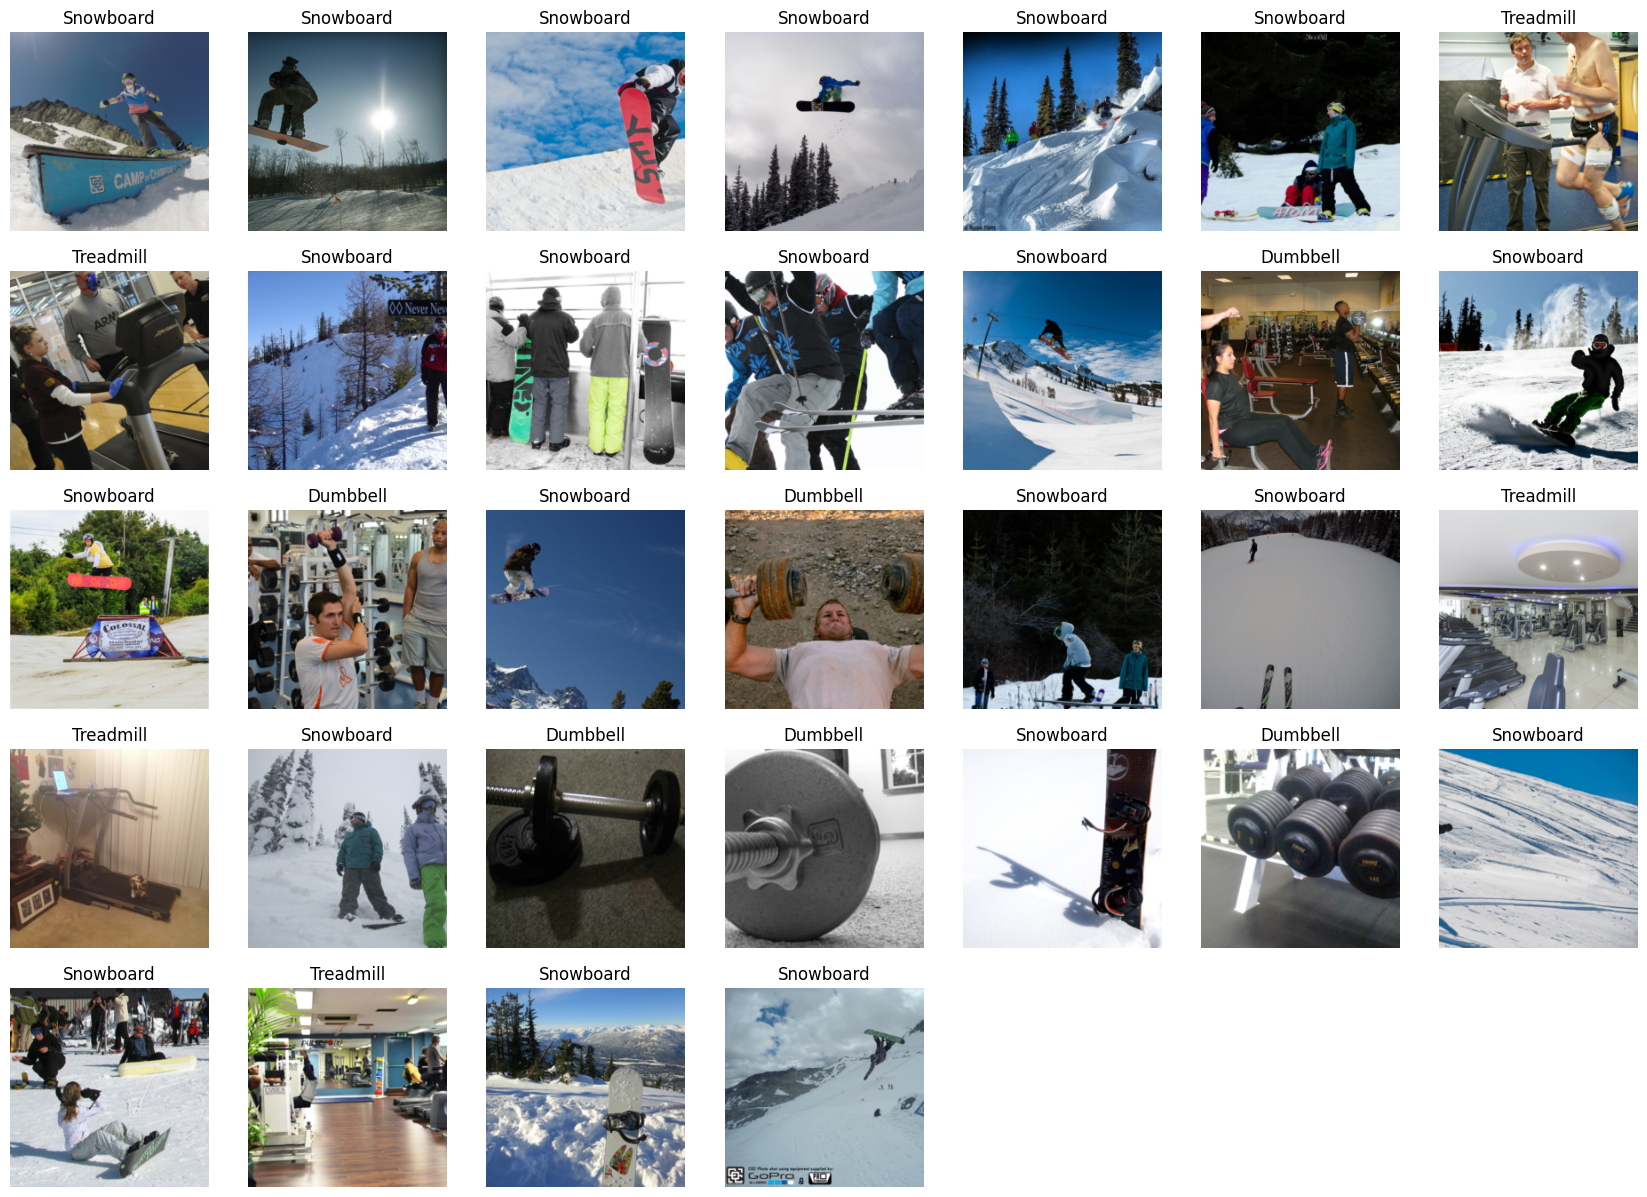

In [21]:
#Datablock
transpotrs = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter= RandomSplitter(valid_pct=0.2, seed=45),
    get_y=parent_label,
    item_tfms=Resize(224)
)

#Dataloader
dls = transpotrs.dataloaders(path)

#datasetni tekshirish
dls.train.show_batch(max_n=32)

In [22]:
#Train
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

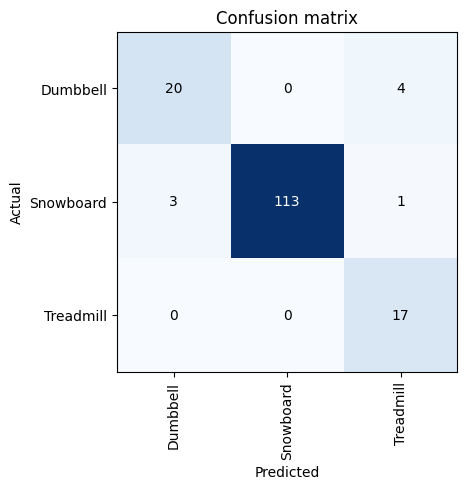

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

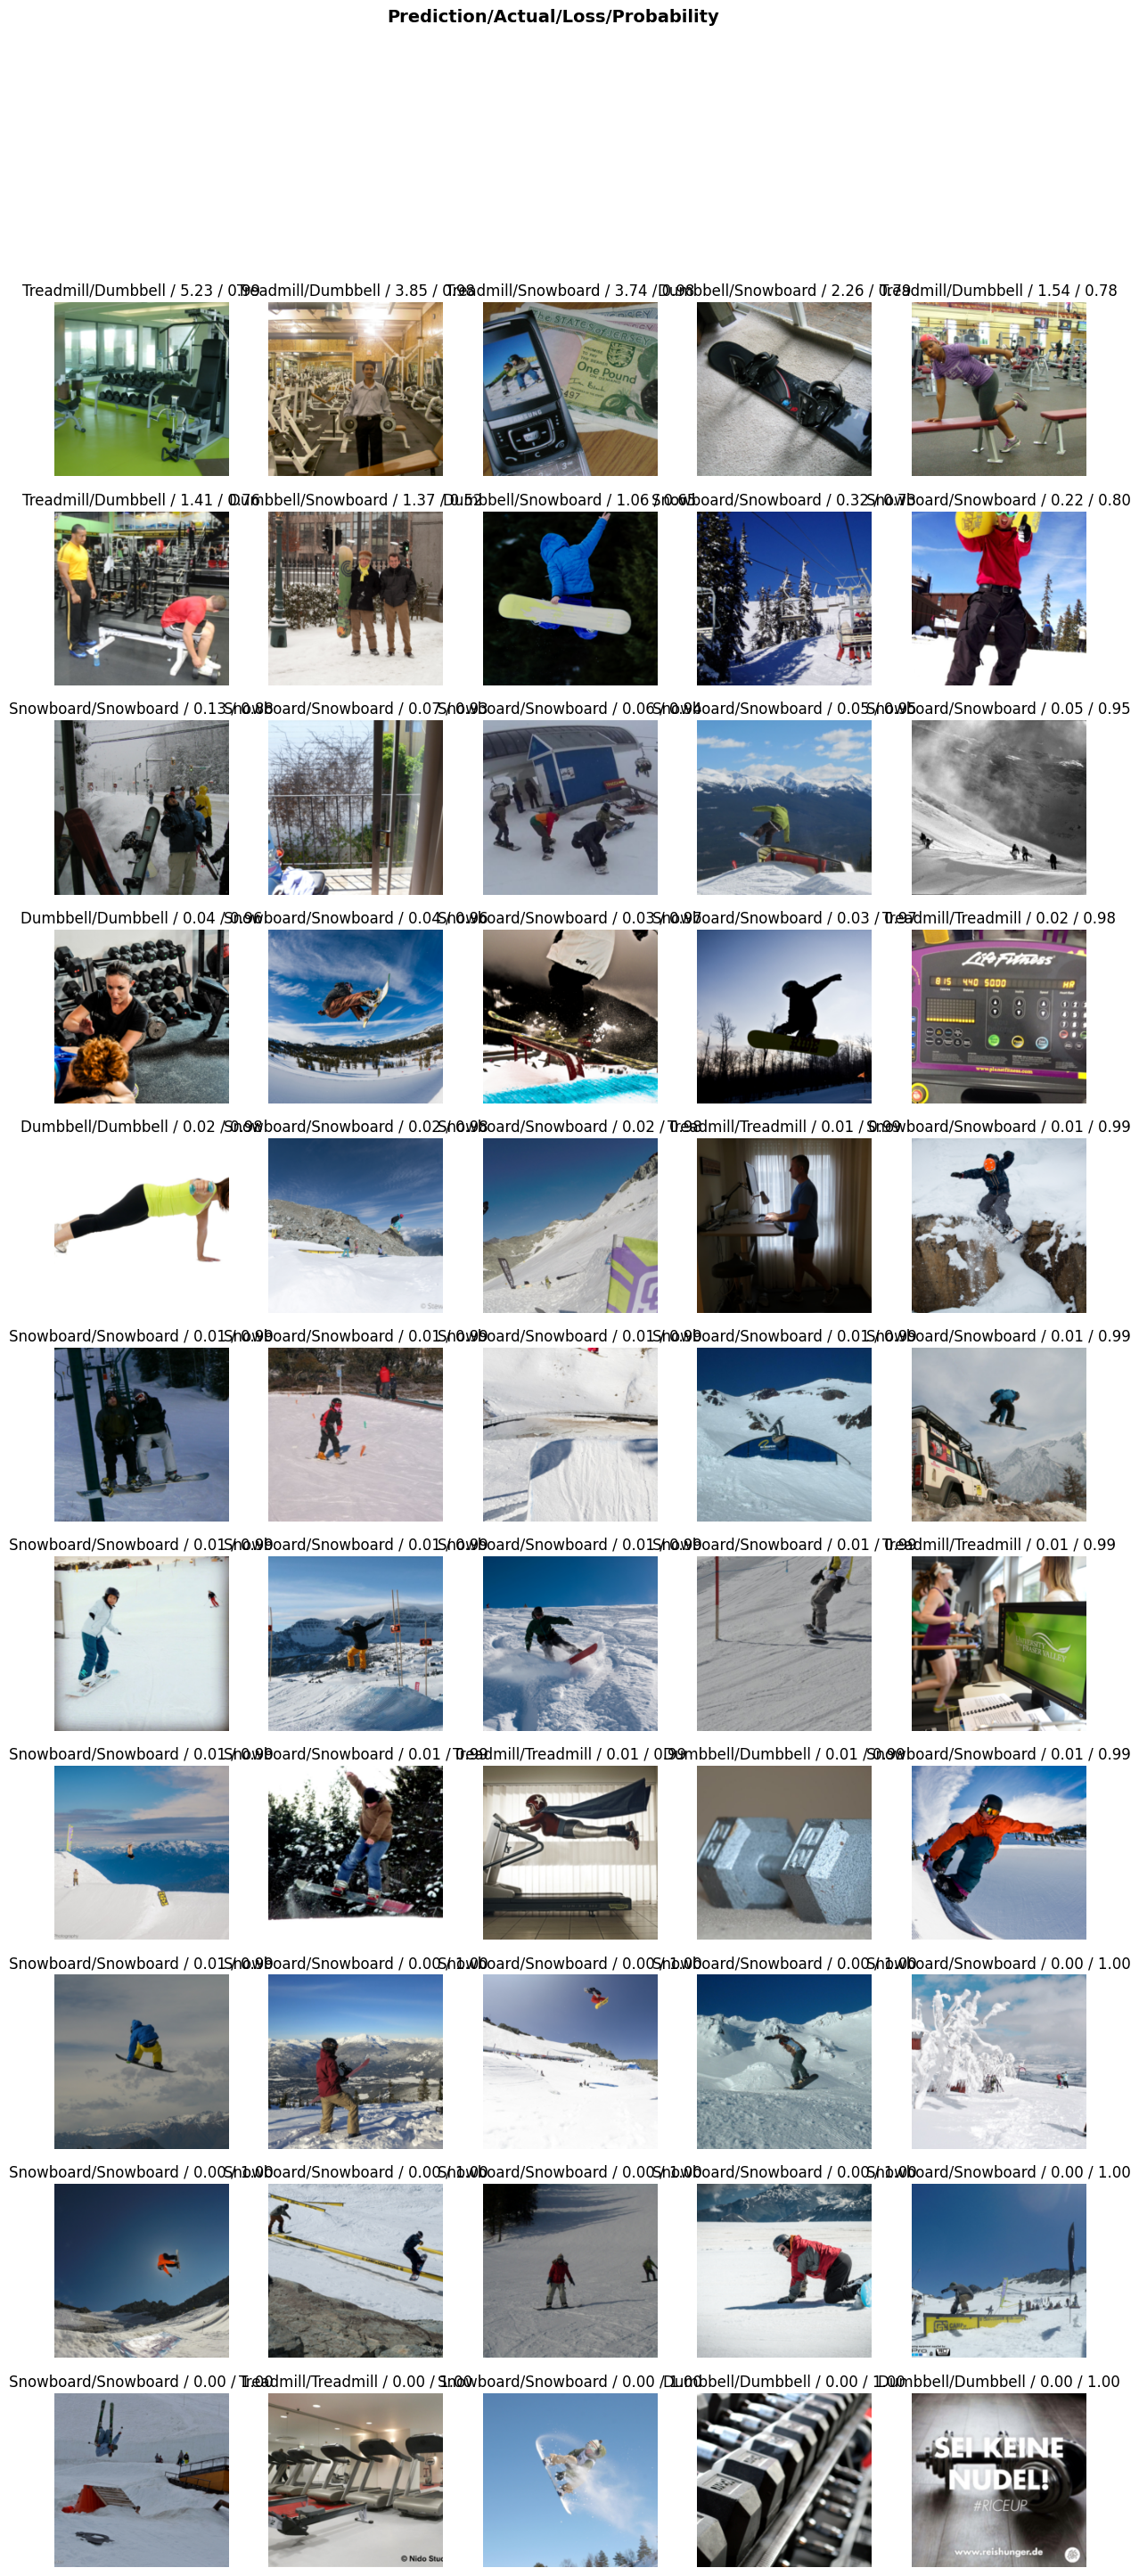

In [24]:
interp.plot_top_losses(55, nrows=11)

In [25]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat: Dumbbell
Ehtimollik: 99.9


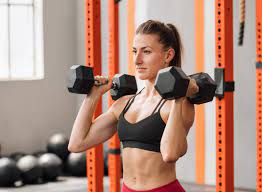

In [30]:
img = PILImage.create(upload.data[-1])
pred , pred_id, probs = learn.predict(img)
print(f"Bashorat: {pred}")
print(f"Ehtimollik: {probs[pred_id]*100:.1f}")
img

In [31]:
#saqlash
learn.export('furniture_model.pkl')